# 최종 파일

In [1]:
import pandas as pd

# CSV 파일 불러오기
file_path = 'data/final_reordered.csv'
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head(1)

,시간대_매출금액,기준_년,기준_분기,시간대,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,...,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,총_상주인구_수,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액
0,605774191.0,2021,1,21~24,A,골목상권,3110955,논현초등학교,11680.0,강남구,...,344558.0,411342.0,387722.5,3430.0,7026.0,4495.0,12.0,2909460.0,6.0,4.481561e+09


In [2]:
# 컬럼 확인
print(df.columns)

Index(['시간대_매출금액', '기준_년', '기준_분기', '시간대', '상권_구분_코드', '상권_구분_코드_명', '상권_코드',
       '상권_코드_명', '자치구_코드', '자치구_코드_명', '행정동_코드', '행정동_코드_명', '시간대_유동인구_수',
       '평일_유동인구_수_평균', '주말_유동인구_수_평균', '총_직장_인구_수', '총_상주인구_수', '총_가구_수',
       '집객시설_수', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액'],
      dtype='object')


In [3]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# EDA

In [17]:
# 데이터 타입 확인
data_types = df.dtypes

# 숫자형 컬럼과 범주형 컬럼으로 나누기
numeric_columns = data_types[data_types != 'object'].index.tolist()
categorical_columns = data_types[data_types == 'object'].index.tolist()

print("수치형 컬럼:")
print(numeric_columns)
print("\n범주형 컬럼:")
print(categorical_columns)

수치형 컬럼:
['시간대_매출금액', '기준_년', '기준_분기', '상권_코드', '자치구_코드', '행정동_코드', '시간대_유동인구_수', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '총_직장_인구_수', '총_상주인구_수', '총_가구_수', '집객시설_수', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액']

범주형 컬럼:
['시간대', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '자치구_코드_명', '행정동_코드_명']


## 종속변수인 시간대_매출금액 시각화

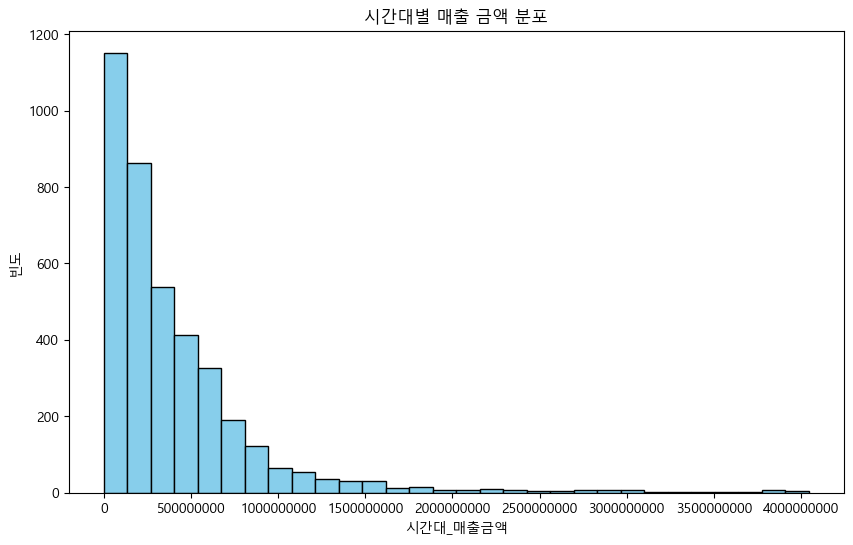

In [8]:
import matplotlib.pyplot as plt

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['시간대_매출금액'], bins=30, color='skyblue', edgecolor='black')
plt.title('시간대별 매출 금액 분포')
plt.xlabel('시간대_매출금액')
plt.ylabel('빈도')
plt.ticklabel_format(style='plain', axis='x')  # 과학적 표기법 비활성화
plt.show()

## 기준_년에 따른 시간대별 평균 매출금액
- 시간대별 편의점 평균 매출이 해가 거듭할수록 증가하는 것을 알 수 있음

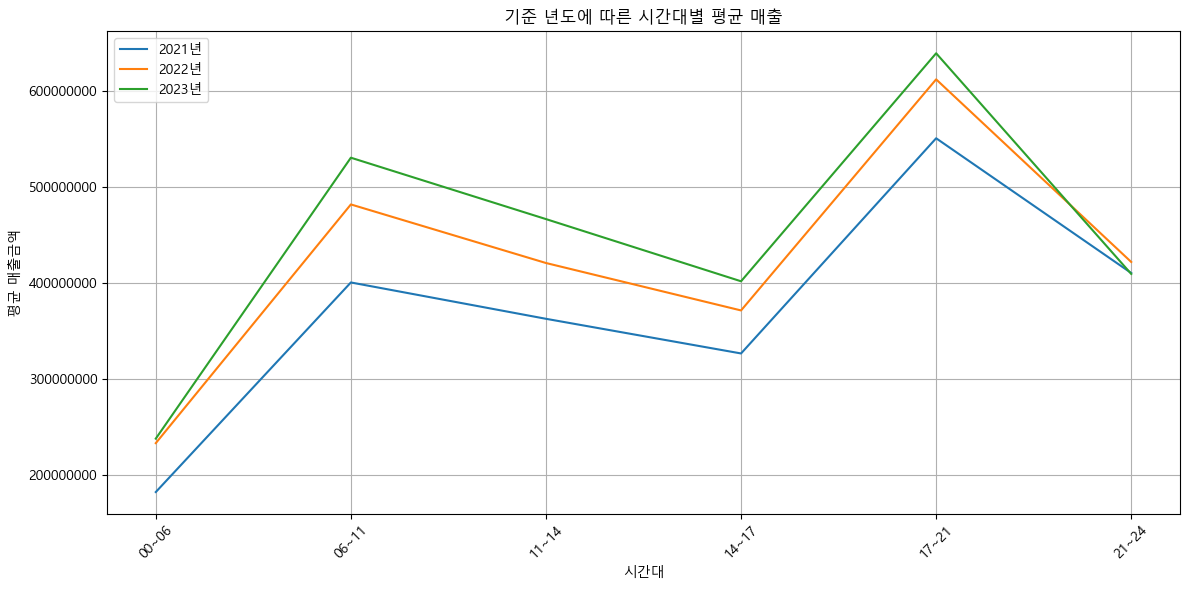

In [14]:
import matplotlib.pyplot as plt

# 데이터 그룹화하여 시간대_평균 매출 계산
df_grouped = df.groupby(['기준_년', '시간대'])['시간대_매출금액'].mean().reset_index()

# 시간대별 평균 매출금액 시각화
plt.figure(figsize=(12, 6))

# 각 년도에 따른 선 그래프 그리기
for year, data in df_grouped.groupby('기준_년'):
    plt.plot(data['시간대'], data['시간대_매출금액'], label=f"{year}년")

plt.title('기준 년도에 따른 시간대별 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출금액')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # 과학적 표기법 비활성화
plt.grid(True)
plt.tight_layout()
plt.show()

## 기준_분기에 따른 시간대별 평균 매출 금액
- 3분기의 매출이 가장 높으며, 1분기의 매출이 가장 낮음을 알 수 있음

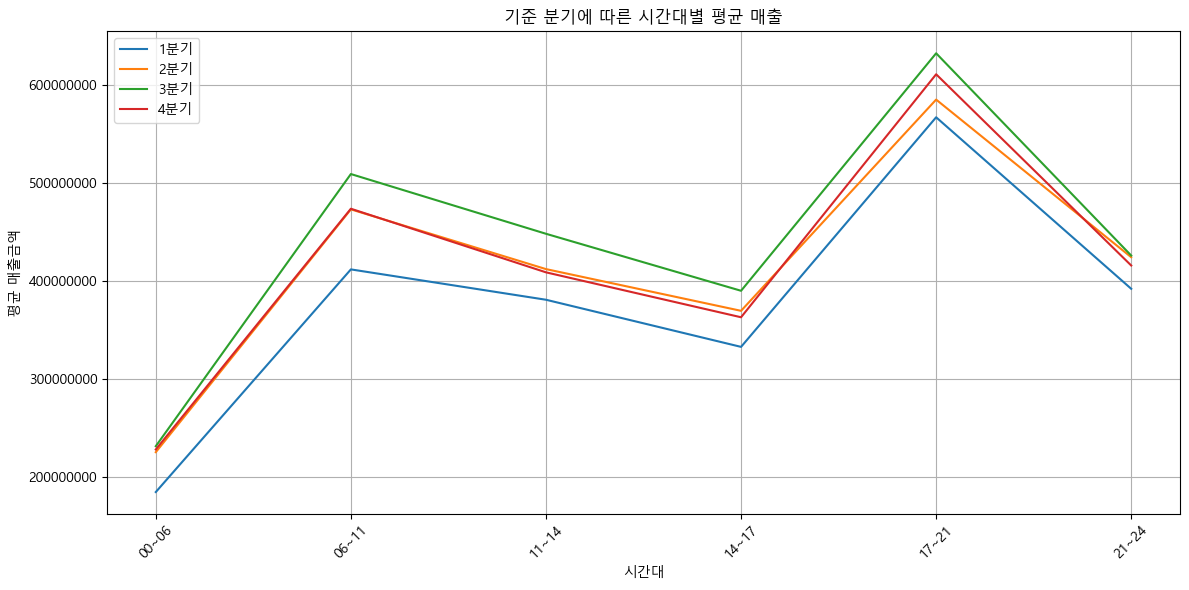

In [16]:
import matplotlib.pyplot as plt

# 데이터 그룹화하여 시간대_평균 매출 계산
df_grouped = df.groupby(['기준_분기', '시간대'])['시간대_매출금액'].mean().reset_index()

# 시간대별 평균 매출금액 시각화
plt.figure(figsize=(12, 6))

# 각 분기에 따른 선 그래프 그리기
for quarter, data in df_grouped.groupby('기준_분기'):
    plt.plot(data['시간대'], data['시간대_매출금액'], label=f"{quarter}분기")

plt.title('기준 분기에 따른 시간대별 평균 매출')
plt.xlabel('시간대')
plt.ylabel('평균 매출금액')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # 과학적 표기법 비활성화
plt.grid(True)
plt.tight_layout()
plt.show()

## 상권_구분_코드_명에 따른 시간대별 평균 매출금액
- 발달상권 > 관광특구 > 골목상권 > 전통시장
- 그러나 00~06 시간대에 관광특구의 평균 매출금액이 가장 낮음을 알 수 있음

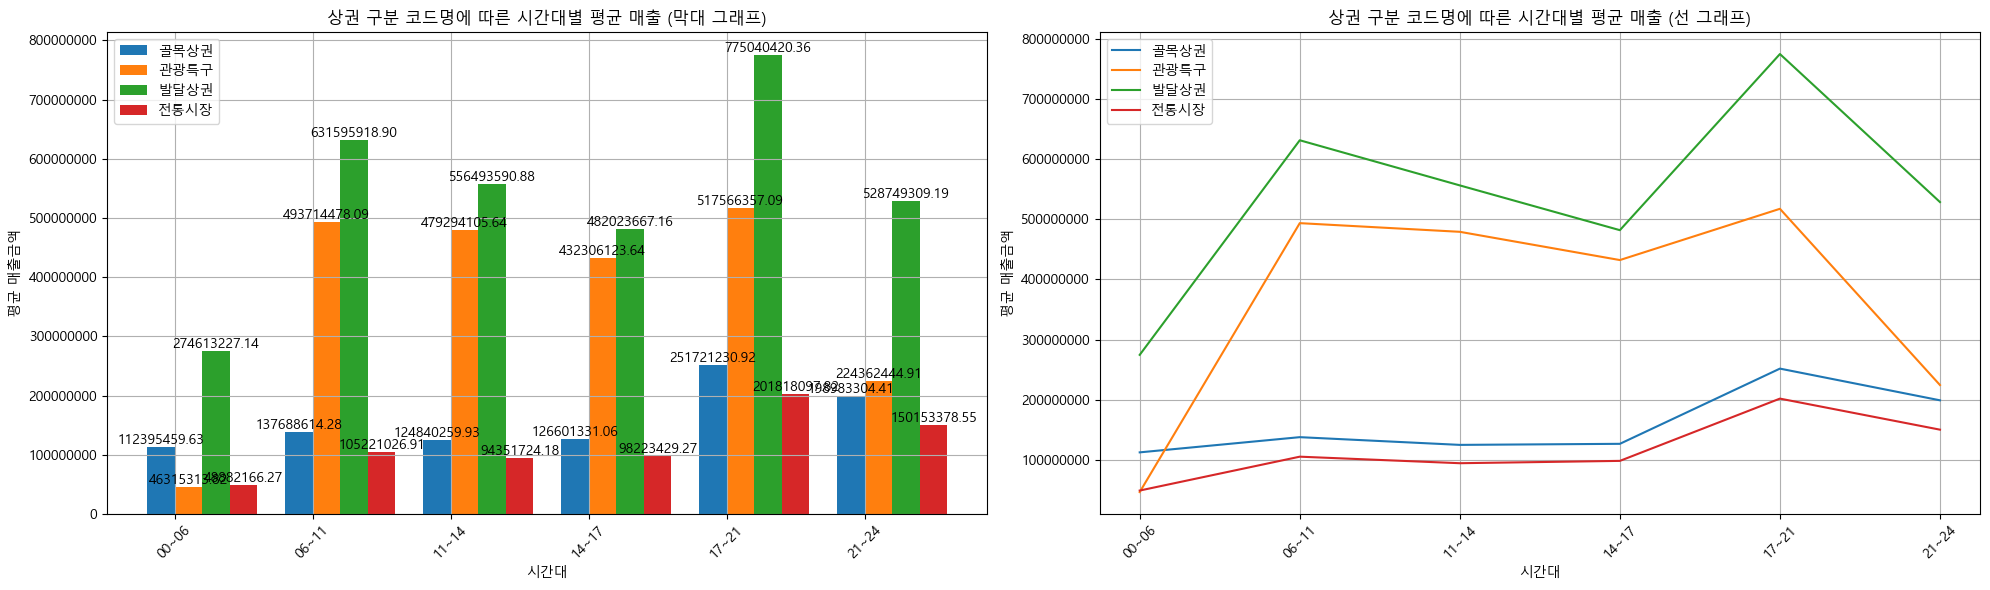

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 그룹화하여 시간대_평균 매출 계산
df_grouped = df.groupby(['상권_구분_코드_명', '시간대'])['시간대_매출금액'].mean().reset_index()

# 시간대별 평균 매출금액 시각화
plt.figure(figsize=(20, 6))

# 시간대의 인덱스
time_indices = np.arange(len(df_grouped['시간대'].unique()))

# 첫 번째 subplot: 막대 그래프
plt.subplot(1, 2, 1)
for i, (market_type, data) in enumerate(df_grouped.groupby('상권_구분_코드_명')):
    plt.bar(time_indices + (i * bar_width), data['시간대_매출금액'], bar_width, label=market_type)
    # 막대 위에 값 표시
    for j, value in enumerate(data['시간대_매출금액']):
        plt.text(j + (i * bar_width), value, f'{value:.2f}', ha='center', va='bottom')

plt.title('상권 구분 코드명에 따른 시간대별 평균 매출 (막대 그래프)')
plt.xlabel('시간대')
plt.ylabel('평균 매출금액')
plt.legend(loc='upper left')
plt.xticks(time_indices + bar_width / 2, df_grouped['시간대'].unique(), rotation=45)
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')  # 과학적 표기법 비활성화

# 두 번째 subplot: 선 그래프
plt.subplot(1, 2, 2)
for market_type, data in df_grouped.groupby('상권_구분_코드_명'):
    plt.plot(data['시간대'], data['시간대_매출금액'], label=market_type)

plt.title('상권 구분 코드명에 따른 시간대별 평균 매출 (선 그래프)')
plt.xlabel('시간대')
plt.ylabel('평균 매출금액')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # 과학적 표기법 비활성화
plt.grid(True)

plt.tight_layout()
plt.show()

## 상권_코드_명, 행정동_코드_명에 따른 시간대별 평균 매출은 streamlit에 구현
- 시각화하면 말도 안되게 나옴